<a href="https://colab.research.google.com/github/tatianaportsova/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Copy_of_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [216]:
Sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
  
mean = sum(Sales) / len(Sales) 
variance = sum([((x - mean) ** 2) for x in Sales]) / len(Sales) 
res = variance ** 0.5

print("Mean: " + str(mean))  
print("Variance: " + str(variance))
print("Standard deviation: " + str(res))

Mean: 3052.714285714286
Variance: 183761.06122448976
Standard deviation: 428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [190]:
store = pd.DataFrame({"Sales":[3505, 2400, 3027, 2798, 3700, 3250, 2689],  
                   "NCustomer":[127, 80, 105, 92, 120, 115, 93]}) 
store

,Sales,NCustomer
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [189]:
store.cov() 

,Sales,NCustomer
Sales,214387.904762,7604.357143
NCustomer,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [218]:
Customers = [127, 80, 105, 92, 120, 115, 93]
  
mean = sum(Customers) / len(Customers) 
variance = sum([((x - mean) ** 2) for x in Customers]) / len(Customers) 
res = variance ** 0.5

print("Standard Deviation Customers: " + str(res))

Standard Deviation Customers: 15.792015549069118


In [187]:
print("Standard Deviation Sales: ", store.Sales.std(ddof=0))
print("Standard Deviation Customers: ", store.NCustomer.std(ddof=0))

Standard Deviation Sales:  428.67360686714756
Standard Deviation Customers:  15.792015549069118


In [220]:
store.corr()

,Sales,NCustomer
Sales,1.000000,0.962834
NCustomer,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [64]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
df.head(3)

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [65]:
df.describe()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
count,1310.000000,1309.000000,1309.000000,1310.000000,1309.000000,1309.000000,1308.000000,121.000000,1310.000000
mean,655.500000,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917,0.225191
std,378.308736,0.837836,0.486055,12.878277,1.041658,0.865560,51.758668,97.696922,0.417867
min,1.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,328.250000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000,0.000000
50%,655.500000,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,155.000000,0.000000
75%,982.750000,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,256.000000,0.000000
max,1310.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [68]:
df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [186]:
df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
import matplotlib.pyplot as plt

In [91]:
v1 = np.array([7, 0])
v2 = np.array([0, -7])

np.dot(v1, v2)

0

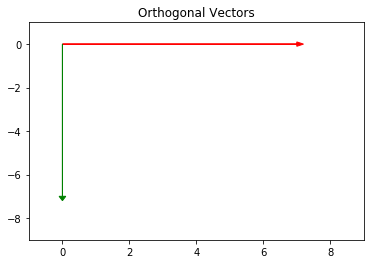

In [125]:
# "Orthogonal" also means "perpendicular".

vector_1 = [7, 0]
vector_2 = [0, -7]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.2, head_length=0.2, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.2, head_length=0.2, color ='green')
plt.xlim(-1,9)          
plt.ylim(-9,1)
plt.title("Orthogonal Vectors")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [185]:
# These two vectors are not orthoginal because their Dot Product isn't equal 0.

a = np.array([-5, 3, 2])
b = np.array([6, -8, 2])

print(f'Dot Product: {np.dot(a,b)}')

Dot Product: -50


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = [2, -15, 6, 20]
C = [i ** 2 for i in c]
C_np = np.array(C)
C = np.sqrt(C_np)   

In [181]:
# ||𝑐||2

C2 = np.sqrt(C)
C2

array([1.41421356, 3.87298335, 2.44948974, 4.47213595])

In [182]:
# Dot Product

np.dot(c,c)

665

In [183]:
# 𝑐𝑇𝑐

c = pd.DataFrame([20, 16, 12, 8, 4])
ct = c.T
ct

,0,1,2,3,4
0,20,16,12,8,4


In [184]:
ct.dot(c)

,0
0,880


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

 
\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} + (-8)\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}


## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

 \begin{align}
 ||f|| = \sqrt{4^2 + 12^2 + 11^2 + 9^2 + 2^2 } = \sqrt{16 + 144 + 121 + 81 + 4} = \sqrt{9} ≈ 19.13113
\end{align}


 \begin{align}
 \hat{f} = \frac{1}{||f||}f = \frac{1}{19.13113}\begin{bmatrix} 4 \\ 12 \\  11 \\ 9 \\ 2 \end{bmatrix} = \begin{bmatrix} \frac{4}{19.13113} \\ \frac{12}{19.13113} \\  \frac{11}{19.13113} \\ \frac{9}{19.13113} \\ \frac{2}{19.13113} \\ \end{bmatrix}
\end{align}

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

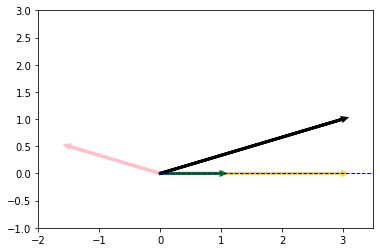

In [152]:

plt.xlim(0, 4)          
plt.ylim(-1,4)

# Linearly Dependent Vectors
v = [1,0] 
v2 = np.multiply(3, v)

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.05, head_length=0.05, color ='#ffd817')
plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')

plt.xlim(-2,3.5)          
plt.ylim(-1,3)

# Linearly Independent Vectors
a = [-1.5,.5] 
b = [3, 1]

# Plot Vectors
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='pink')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='black')


plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

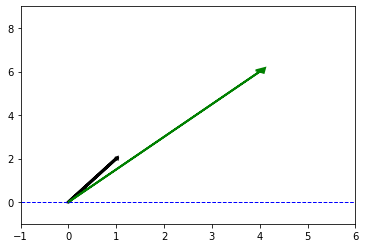

In [123]:
# The vectors g and h span two-dimentional space(ℝ2) bc they're linearly independent.

plt.xlim(-1, 6)          
plt.ylim(-1, 9)

# Original Vector
g = [1, 2] 
ℎ = [4, 6]

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, g[0], g[1], linewidth=3, head_width=.05, head_length=0.05, color ='black')
plt.arrow(0,0, h[0], h[1], linewidth=2, head_width=.2, head_length=0.2, color ='green')

plt.show()

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

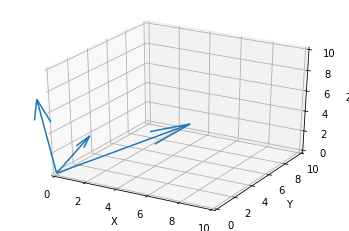

In [148]:
# Vectors l, m, n span three-dimensional space(ℝ3).

from mpl_toolkits.mplot3d import Axes3D
import numpy as np

vectors = np.array([[0, 0, 0, 1, 2, 3], 
                    [0, 0, 0, -1, 0, 7],
                    [0, 0, 0, 4, 8, 2]])

X, Y, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_zlim([0, 10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



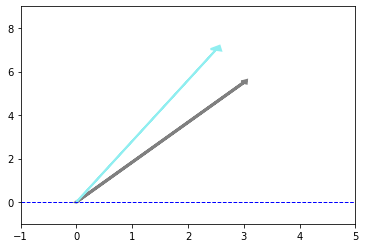

In [122]:
# Vectors q and w form a basis for ℝ2

plt.xlim(-1, 5)          
plt.ylim(-1, 9)

# Original Vector
q = [3, 5.5] 
w = [2.5, 7]

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, q[0], q[1], linewidth=3, head_width=.1, head_length=0.1, color ='grey')
plt.arrow(0,0, w[0], w[1], linewidth=2, head_width=.2, head_length=0.2, color ='#90eef0')

plt.show()

## 6.2 What does it mean to form a basis?

"A basis of a vector space is any linearly independent subset of it that spans the whole vector space.  In other words, each vector in the vector space can be written exactly in one way as a linear combination of the basis vectors", 
David Joyce, Professor of Mathematics and Computer Science.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
P = ([[1, 2, 3], [-1, 0, 7], [4, 8, 2]])

In [35]:
np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

The rank of the matrix tell us how many vectors in the matrix are dpendent or independent. eg, the matrix P has 2 independent rows. Even though the original matrix is a 3x3 matrix, it can't span  ℝ3 , only  ℝ2.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

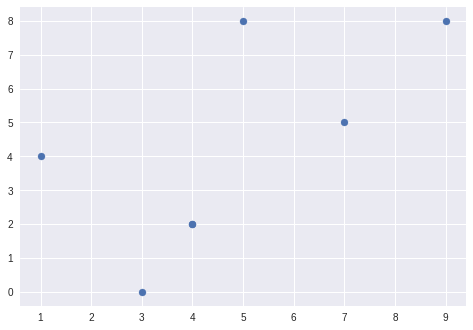

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()